In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import torch 
import matplotlib.pyplot as plt
import pickle as pkl
pd.options.display.max_columns = 100

best_loss ={}
dfs = {}
params = {'axes.labelsize': 35,
          'axes.titlesize': 35,
         }
plt.rcParams.update(params)
steplr = 50
scheduler = 'step'

In [2]:
import os
os.getcwd()

'/home/liangluxu/discrete_sampler/work_space'

In [6]:
def get_agg_data(names, curve_type='train'):
    folder_path = './logs'
    paths = [os.path.join(folder_path, name) for name in names]      
    curves = {name: pkl.load(open(fp, 'rb')) for name, fp in zip(names, paths)}#get_data(names[opt])  
    df_agg = pd.DataFrame({ key : value[curve_type +'_score'] for key, value in curves.items()})
    return df_agg

def agg_plot(names, curve_type='train', labels = None, ylim=(80,101), xlim=None, loc = 'upper right', figsize=(10,8)):
    plt.figure(figsize=figsize)
    plt.ylim(ylim)
    if xlim:
      plt.xlim(xlim)
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
   
        df_agg = get_agg_data(names[opt], curve_type)
    
        acc = np.array(df_agg.mean(axis=1))
        std = np.array(df_agg.std(axis=1))    
        x = range(1, len(acc)+1)
        if 'sghmc' in label.lower():
            plt.plot(x, acc, '-', label=label, linewidth=2)
        else: 
            plt.plot(x, acc, '--', label=label, linewidth=1.5)
        plt.fill_between(x, acc-std, acc+std, alpha=0.15)
  
    plt.legend(fontsize=15, loc=loc)
    plt.grid()
    plt.title('{} SCORE'.format(curve_type.upper()))
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.xticks(fontsize =25)
    plt.yticks(fontsize =25)
    plt.tight_layout()
    plt.show()

def get_best_acc(names, curve_type='train', labels = None):  
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
        df_agg = get_agg_data(names[opt], curve_type)
        print(opt, df_agg.min(axis=0).mean(), df_agg.min(axis=0).std())

def get_agg_data_run_time(names, curve_type='train'):
    folder_path = './logs'
    paths = [os.path.join(folder_path, name) for name in names]      
    curves = {name: pkl.load(open(fp, 'rb')) for name, fp in zip(names, paths)}#get_data(names[opt])  
    #for name in names:
    #   print('####curves###', curves[names[name][0]]['running_time'])
    df_agg = {key : value['running_time'] for key, value in curves.items()}
    #df_agg = {key : value['training_time'] for key, value in curves.items()}
    return df_agg


    


## BS p=5, m=5, complete market

### hs=1

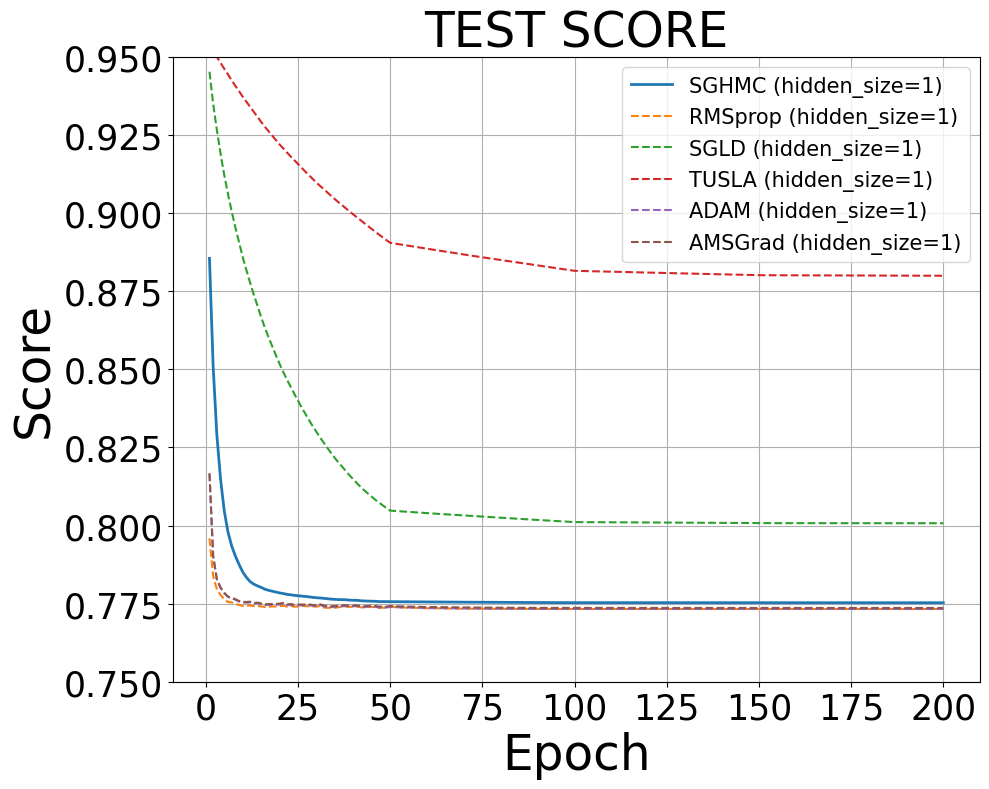

sghmc (hidden_size=1) 0.7752844542264938 nan
rmsprop (hidden_size=1) 0.7732564836740494 nan
sgld (hidden_size=1) 0.800738301873207 nan
tusla (hidden_size=1) 0.8799679130315781 nan
adam (hidden_size=1) 0.7732729375362396 nan
amsgrad (hidden_size=1) 0.7736057311296463 nan


In [48]:
names = {'sghmc (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=1)',
          'RMSprop (hidden_size=1)',
          'SGLD (hidden_size=1)',
          'TUSLA (hidden_size=1)',
          'ADAM (hidden_size=1)',
          'AMSGrad (hidden_size=1)',
         # 'theopoula (hidden_size=1)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.75, 0.95), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [5]:
names = {'sghmc (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-adam-seed777-lr0.1-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=1)':['BS-p5-m5-strike5.0-num_step40-hs1-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
#for name in names:#['sghmc (hidden_size=1)']
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=m=5, hs=1', list(data.keys())[0].split('-')[7], list(data.values()))


p=m=5, hs=1 sghmc [3155.839362859726]
p=m=5, hs=1 rmsprop [2292.439573764801]
p=m=5, hs=1 sgld [2883.9908118247986]
p=m=5, hs=1 tusla [3191.9660634994507]
p=m=5, hs=1 adam [2532.3109772205353]
p=m=5, hs=1 amsgrad [2544.114157676697]
p=m=5, hs=1 theopoula [3274.650179862976]


# hs=5

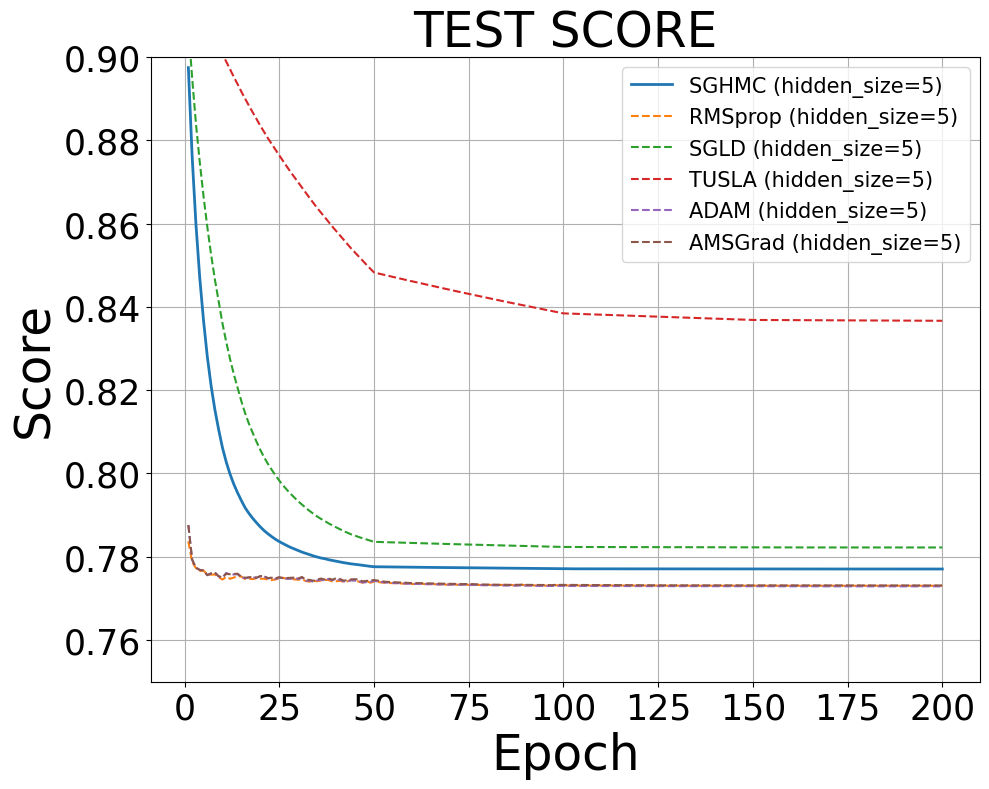

sghmc (hidden_size=5) 0.7770634233951569 nan
rmsprop (hidden_size=5) 0.7730448454618454 nan
sgld (hidden_size=5) 0.7822335839271546 nan
tusla (hidden_size=5) 0.8366624146699906 nan
adam (hidden_size=5) 0.7729015707969665 nan
amsgrad (hidden_size=5) 0.7731127500534057 nan


In [49]:
names = {'sghmc (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=5)',
          'RMSprop (hidden_size=5)',
          'SGLD (hidden_size=5)',
          'TUSLA (hidden_size=5)',
          'ADAM (hidden_size=5)',
          'AMSGrad (hidden_size=5)',
         # 'theopoula (hidden_size=5)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.75, 0.9), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [137]:
names = {'sghmc (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-rmsprop-seed777-lr0.05-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=5)':['BS-p5-m5-strike5.0-num_step40-hs5-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
#for name in names:#['sghmc (hidden_size=1)']
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=m=5, hs=5', list(data.keys())[0].split('-')[7], list(data.values()))


p=m=5, hs=5 sghmc [3214.676195383072]
p=m=5, hs=5 rmsprop [2390.0167241096497]
p=m=5, hs=5 sgld [2889.7584393024445]
p=m=5, hs=5 tusla [3217.2114107608795]
p=m=5, hs=5 adam [2686.0362689495087]
p=m=5, hs=5 amsgrad [2534.811820745468]
p=m=5, hs=5 theopoula [3335.9458734989166]


# hs=10

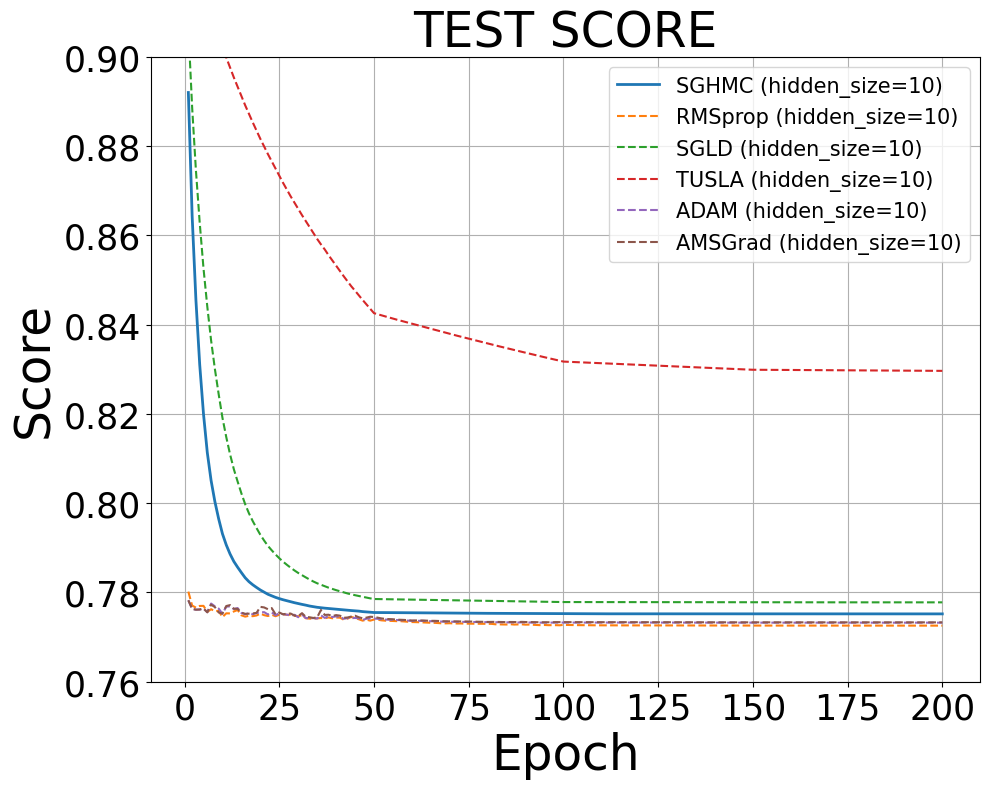

sghmc (hidden_size=10) 0.7752003818750381 nan
rmsprop (hidden_size=10) 0.7725680261850357 nan
sgld (hidden_size=10) 0.7777881741523742 nan
tusla (hidden_size=10) 0.8296643644571304 nan
adam (hidden_size=10) 0.7732286036014557 nan
amsgrad (hidden_size=10) 0.7733047604560852 nan


In [50]:
names = {'sghmc (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=10)',
          'RMSprop (hidden_size=10)',
          'SGLD (hidden_size=10)',
          'TUSLA (hidden_size=10)',
          'ADAM (hidden_size=10)',
          'AMSGrad (hidden_size=10)',
         # 'theopoula (hidden_size=10)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.76, 0.9), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [139]:
names = {'sghmc (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=10)':['BS-p5-m5-strike5.0-num_step40-hs10-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
#for name in names:#['sghmc (hidden_size=1)']
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=m=5, hs=10', list(data.keys())[0].split('-')[7], list(data.values()))

p=m=5, hs=10 sghmc [3138.0012607574463]
p=m=5, hs=10 rmsprop [2568.126936197281]
p=m=5, hs=10 sgld [2912.687254667282]
p=m=5, hs=10 tusla [3238.949334859848]
p=m=5, hs=10 adam [2504.6685724258423]
p=m=5, hs=10 amsgrad [2536.6942110061646]
p=m=5, hs=10 theopoula [3394.0002524852753]


## BS p=5, m=10, incomplete market

## hidden_size = 1

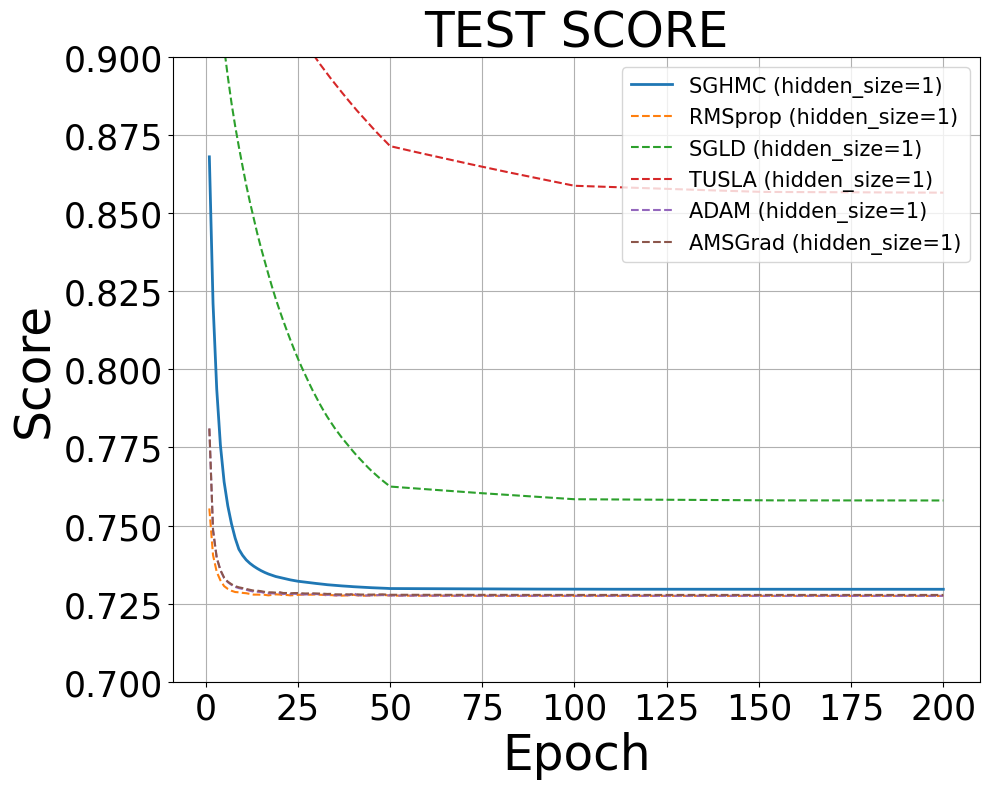

sghmc (hidden_size=1) 0.7295981526374817 nan
rmsprop (hidden_size=1) 0.727472123503685 nan
sgld (hidden_size=1) 0.7580250710248947 nan
tusla (hidden_size=1) 0.8565671026706696 nan
adam (hidden_size=1) 0.72748863697052 nan
amsgrad (hidden_size=1) 0.7277825266122818 nan


In [52]:
names = {'sghmc (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=1)',
          'RMSprop (hidden_size=1)',
          'SGLD (hidden_size=1)',
          'TUSLA (hidden_size=1)',
          'ADAM (hidden_size=1)',
          'AMSGrad (hidden_size=1)',
         # 'theopoula (hidden_size=1)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.7, 0.9), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [141]:
names = {'sghmc (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=1)':['BS-p5-m10-strike5.0-num_step40-hs1-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
#for name in names:#['sghmc (hidden_size=1)']
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=5, m=10, hs=1', list(data.keys())[0].split('-')[7], list(data.values()))

p=5, m=10, hs=1 sghmc [3219.044993162155]
p=5, m=10, hs=1 rmsprop [2419.9358751773834]
p=5, m=10, hs=1 sgld [2929.7399768829346]
p=5, m=10, hs=1 tusla [3252.8577761650085]
p=5, m=10, hs=1 adam [2534.0682821273804]
p=5, m=10, hs=1 amsgrad [2645.8466188907623]
p=5, m=10, hs=1 theopoula [3435.7318007946014]


## hidden_size = 5

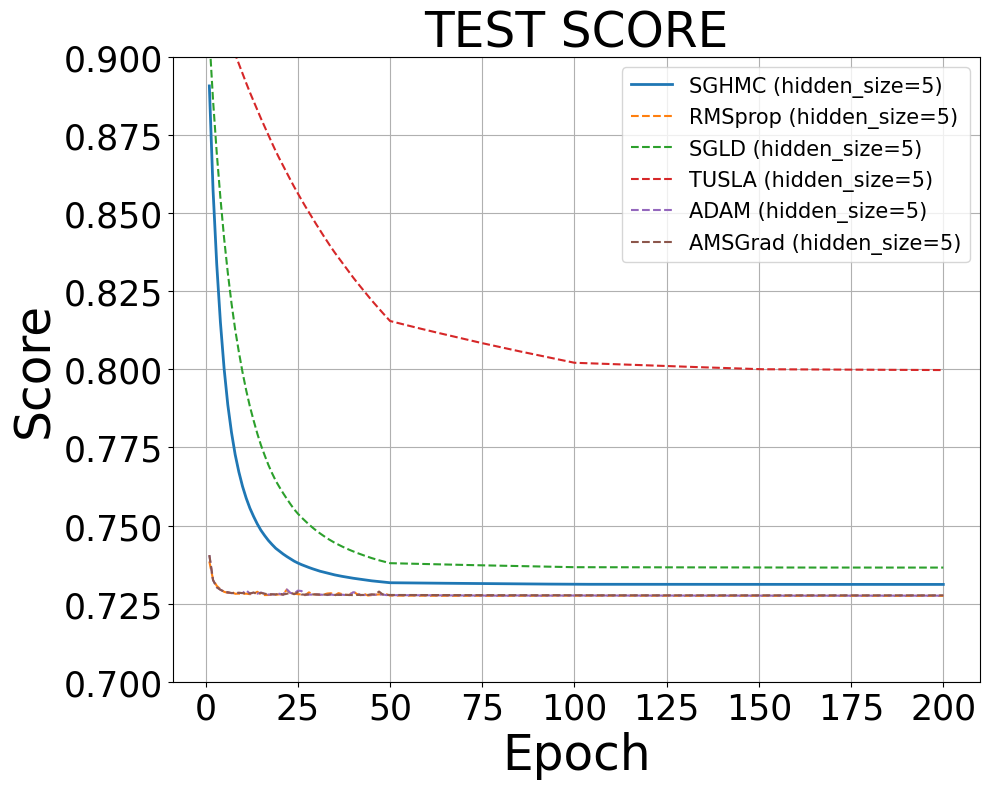

sghmc (hidden_size=5) 0.73114994764328 nan
rmsprop (hidden_size=5) 0.7274843126535415 nan
sgld (hidden_size=5) 0.7365435689687729 nan
tusla (hidden_size=5) 0.7997747153043747 nan
adam (hidden_size=5) 0.7275503009557724 nan
amsgrad (hidden_size=5) 0.7276650100946427 nan


In [53]:
names = {'sghmc (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=5)',
          'RMSprop (hidden_size=5)',
          'SGLD (hidden_size=5)',
          'TUSLA (hidden_size=5)',
         # 'SGD (hidden_size=5)',
          'ADAM (hidden_size=5)',
          'AMSGrad (hidden_size=5)',
         # 'theopoula (hidden_size=5)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.7, 0.9), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [147]:
names = {'sghmc (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-rmsprop-seed777-lr0.05-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=5)':['BS-p5-m10-strike5.0-num_step40-hs5-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
#for name in names:#['sghmc (hidden_size=1)']
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=5, m=10, hs=5', list(data.keys())[0].split('-')[7], list(data.values()))

p=5, m=10, hs=5 sghmc [3210.7743072509766]
p=5, m=10, hs=5 rmsprop [2443.0334475040436]
p=5, m=10, hs=5 sgld [2947.4784405231476]
p=5, m=10, hs=5 tusla [3285.7632372379303]
p=5, m=10, hs=5 adam [2627.7903547286987]
p=5, m=10, hs=5 amsgrad [2428.6909670829773]
p=5, m=10, hs=5 theopoula [3586.7820913791656]


## hidden_size = 10

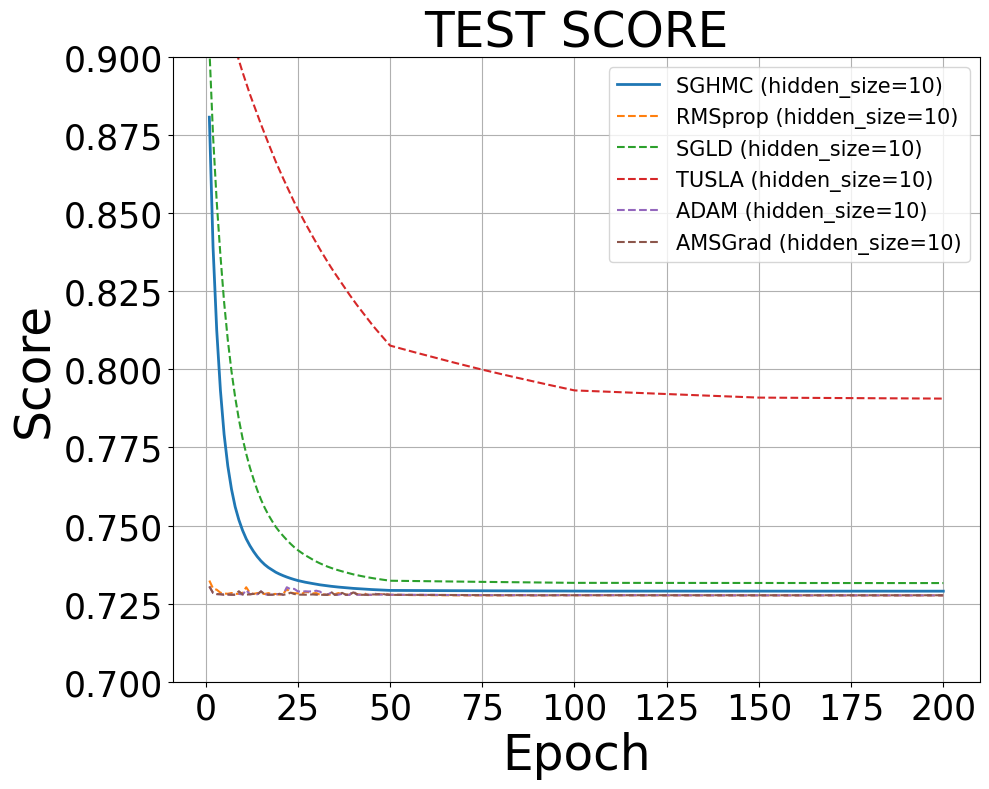

sghmc (hidden_size=10) 0.7289894640445709 nan
rmsprop (hidden_size=10) 0.7276226073503494 nan
sgld (hidden_size=10) 0.731586804986 nan
tusla (hidden_size=10) 0.7906405001878738 nan
adam (hidden_size=10) 0.7276464998722076 nan
amsgrad (hidden_size=10) 0.7276763677597046 nan


In [54]:
names = {'sghmc (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=10)',
          'RMSprop (hidden_size=10)',
          'SGLD (hidden_size=10)',
          'TUSLA (hidden_size=10)',
          'ADAM (hidden_size=10)',
          'AMSGrad (hidden_size=10)',
         # 'theopoula (hidden_size=10)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.7, 0.9), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [150]:
names = {'sghmc (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=10)':['BS-p5-m10-strike5.0-num_step40-hs10-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=5, m=10, hs=10', list(data.keys())[0].split('-')[7], list(data.values()))


p=5, m=10, hs=10 sghmc [3189.370745420456]
p=5, m=10, hs=10 rmsprop [2528.993884086609]
p=5, m=10, hs=10 sgld [2960.9754304885864]
p=5, m=10, hs=10 tusla [3294.782787322998]
p=5, m=10, hs=10 adam [2647.988272666931]
p=5, m=10, hs=10 amsgrad [2706.0034987926483]
p=5, m=10, hs=10 theopoula [3719.739381790161]


## BS p=50, m=50, complete market
## hidden_size = 1

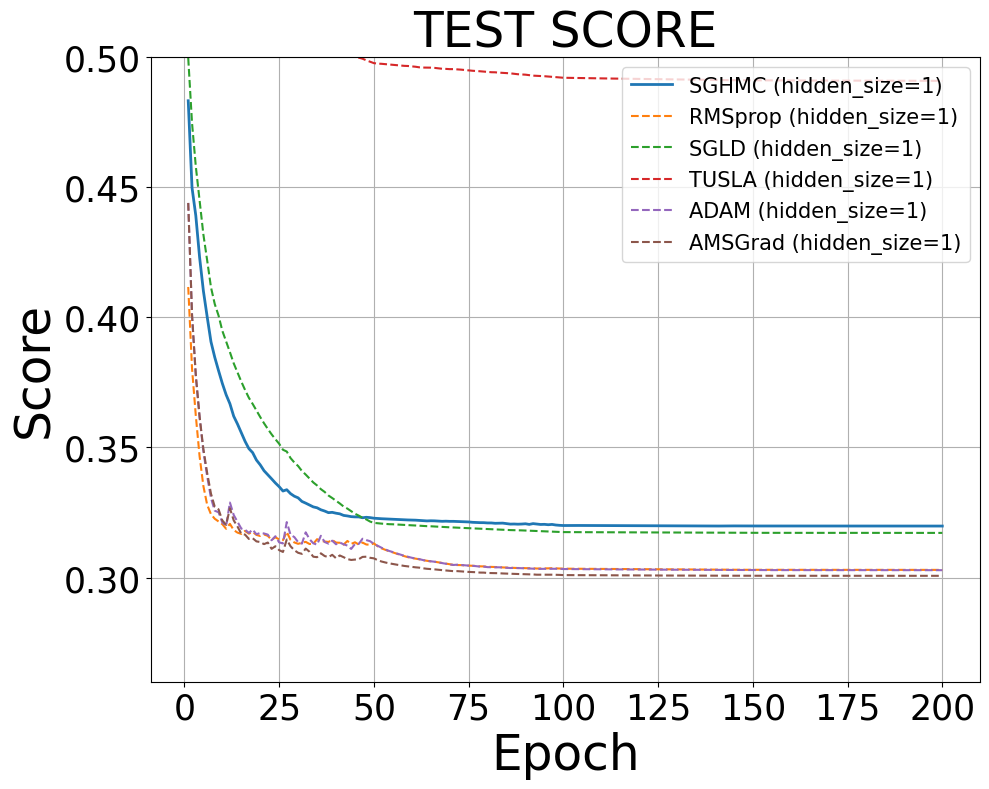

sghmc (hidden_size=1) 0.31980418264865873 nan
rmsprop (hidden_size=1) 0.30296450555324556 nan
sgld (hidden_size=1) 0.3171721786260605 nan
tusla (hidden_size=1) 0.4908444508910179 nan
adam (hidden_size=1) 0.30285146832466125 nan
amsgrad (hidden_size=1) 0.30068339705467223 nan


In [29]:
names = {'sghmc (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-sgld-seed777-lr0.5-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=1)',
          'RMSprop (hidden_size=1)',
          'SGLD (hidden_size=1)',
          'TUSLA (hidden_size=1)',
          'ADAM (hidden_size=1)',
          'AMSGrad (hidden_size=1)',
         # 'theopoula (hidden_size=1)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.26, 0.5), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [20]:
names = {'sghmc (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=1)':['BS-p50-m50-strike50.0-num_step40-hs1-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=50, m=50, hs=1', list(data.keys())[0].split('-')[7], list(data.values()))


p=50, m=50, hs=1 sghmc [3808.172616958618]
p=50, m=50, hs=1 rmsprop [2990.977839231491]
p=50, m=50, hs=1 sgld [3400.5411500930786]
p=50, m=50, hs=1 tusla [3918.8316702842712]
p=50, m=50, hs=1 adam [3195.2364099025726]
p=50, m=50, hs=1 amsgrad [3176.797041416168]


## hidden_size = 5

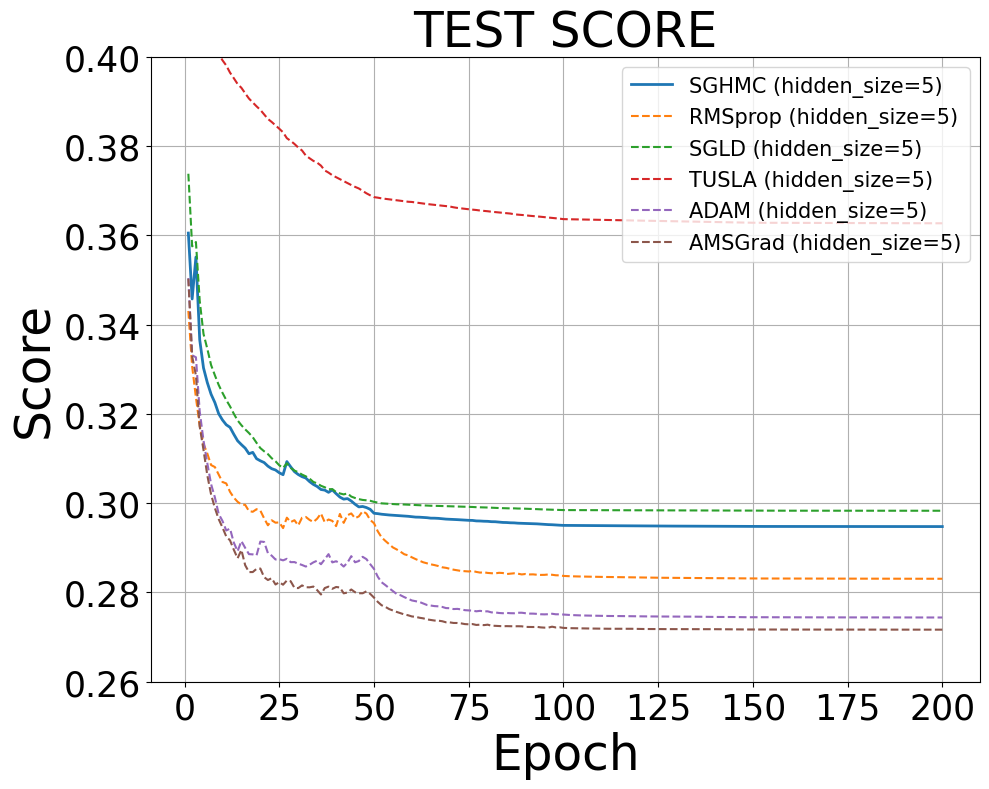

sghmc (hidden_size=5) 0.29477008134126664 nan
rmsprop (hidden_size=5) 0.2830728679895401 nan
sgld (hidden_size=5) 0.29831586331129073 nan
tusla (hidden_size=5) 0.3627332985401154 nan
adam (hidden_size=5) 0.2743928611278534 nan
amsgrad (hidden_size=5) 0.2716659441590309 nan


In [26]:
names = {'sghmc (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-sgld-seed777-lr0.5-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-theopoula-seed777-lr0.1-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=5)',
          'RMSprop (hidden_size=5)',
          'SGLD (hidden_size=5)',
          'TUSLA (hidden_size=5)',
          'ADAM (hidden_size=5)',
          'AMSGrad (hidden_size=5)',
         # 'theopoula (hidden_size=5)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.26, 0.4), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [155]:
names = {'sghmc (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-sgld-seed777-lr0.1-beta1.0e+12--wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=5)':['BS-p50-m50-strike50.0-num_step40-hs5-bs128-theopoula-seed777-lr0.1-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=50, m=50, hs=5', list(data.keys())[0].split('-')[7], list(data.values()))


p=50, m=50, hs=5 sghmc [3617.8435776233673]
p=50, m=50, hs=5 rmsprop [3013.2532861232758]
p=50, m=50, hs=5 sgld [3393.557425737381]
p=50, m=50, hs=5 tusla [3733.6622548103333]
p=50, m=50, hs=5 adam [3173.080493211746]
p=50, m=50, hs=5 amsgrad [3171.7515347003937]
p=50, m=50, hs=5 theopoula [3720.451001882553]


## hidden_size = 10

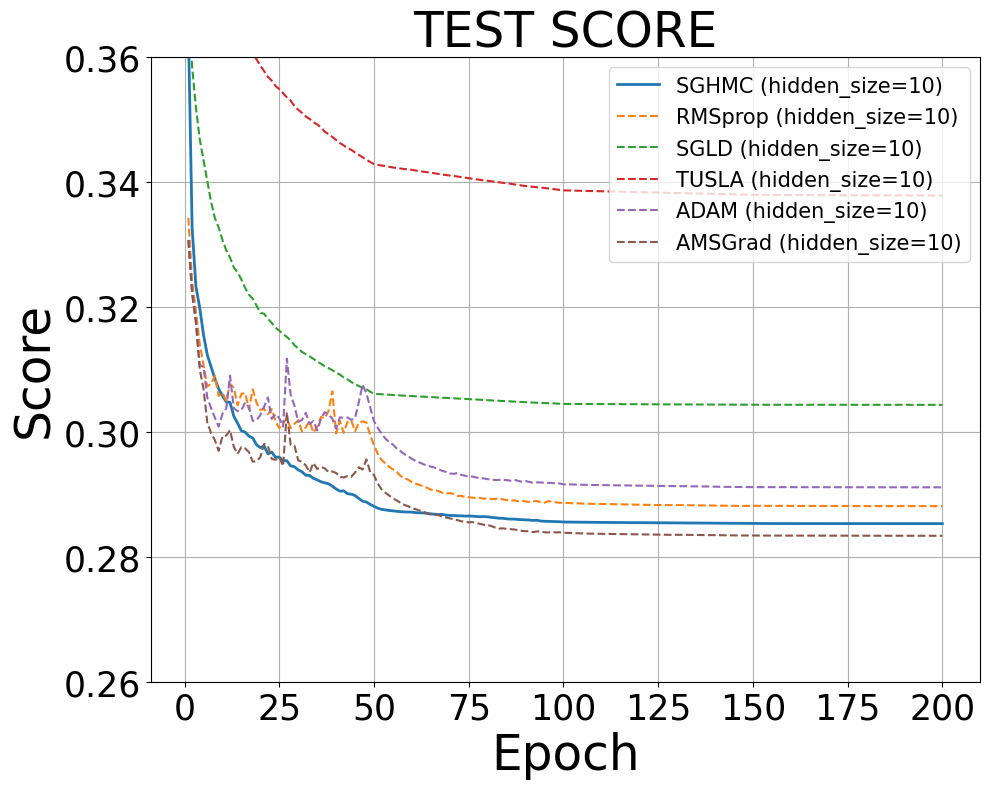

sghmc (hidden_size=10) 0.28530503511428834 nan
rmsprop (hidden_size=10) 0.28810000270605085 nan
sgld (hidden_size=10) 0.30431937575340273 nan
tusla (hidden_size=10) 0.3378171414136887 nan
adam (hidden_size=10) 0.29111388623714446 nan
amsgrad (hidden_size=10) 0.28335735499858855 nan


In [28]:
names = {'sghmc (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-sgld-seed777-lr0.1-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-theopoula-seed777-lr0.1-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=10)',
          'RMSprop (hidden_size=10)',
          'SGLD (hidden_size=10)',
          'TUSLA (hidden_size=10)',
          'ADAM (hidden_size=10)',
          'AMSGrad (hidden_size=10)',
         # 'theopoula (hidden_size=10)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (0.26, 0.36), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [159]:
names = {'sghmc (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-sgld-seed777-lr0.1-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=10)':['BS-p50-m50-strike50.0-num_step40-hs10-bs128-theopoula-seed777-lr0.1-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=50, m=50, hs=10', list(data.keys())[0].split('-')[7], list(data.values()))


p=50, m=50, hs=10 sghmc [3697.4150898456573]
p=50, m=50, hs=10 rmsprop [3014.8368661403656]
p=50, m=50, hs=10 sgld [3377.86123752594]
p=50, m=50, hs=10 tusla [3699.662059545517]
p=50, m=50, hs=10 adam [3140.8607833385468]
p=50, m=50, hs=10 amsgrad [3173.6155309677124]
p=50, m=50, hs=10 theopoula [3821.6276354789734]


## BS p=50, m=60, incomplete market
## hidden_size = 1

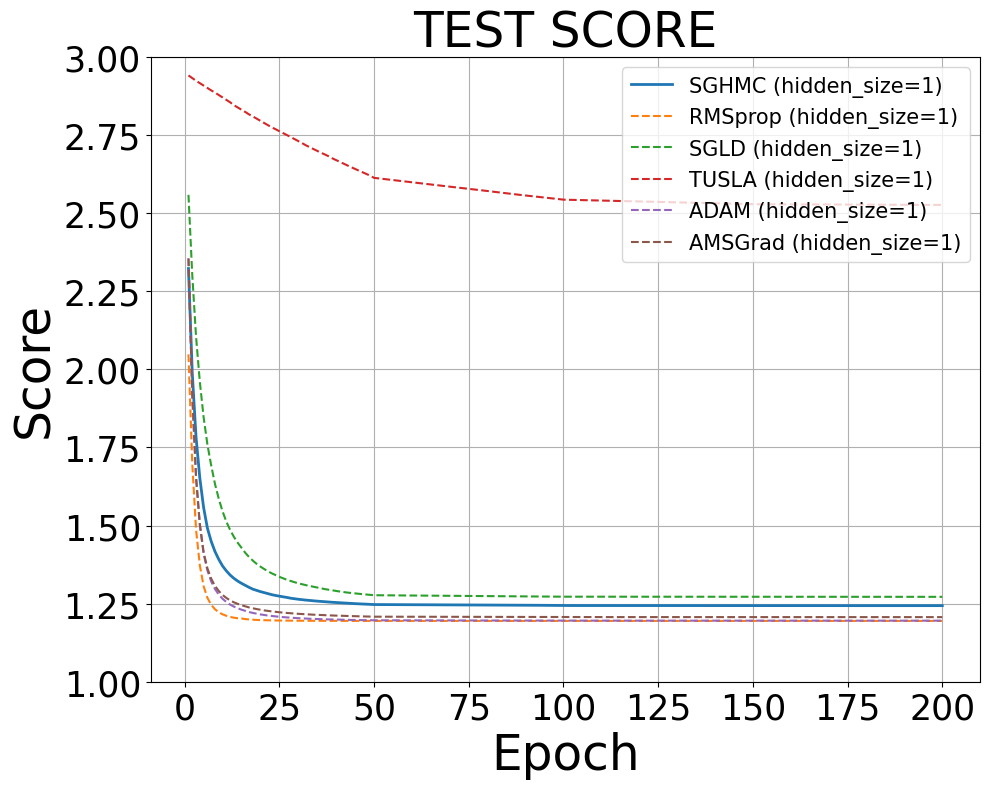

sghmc (hidden_size=1) 1.2435574412345887 nan
rmsprop (hidden_size=1) 1.1946093022823334 nan
sgld (hidden_size=1) 1.2717482566833496 nan
tusla (hidden_size=1) 2.5264237999916075 nan
adam (hidden_size=1) 1.195420902967453 nan
amsgrad (hidden_size=1) 1.2068440079689027 nan


In [36]:

names = {'sghmc (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-sgld-seed777-lr0.5-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=1)',
          'RMSprop (hidden_size=1)',
          'SGLD (hidden_size=1)',
          'TUSLA (hidden_size=1)',
          'ADAM (hidden_size=1)',
          'AMSGrad (hidden_size=1)',
         # 'theopoula (hidden_size=1)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (1, 3), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [161]:
names = {'sghmc (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-rmsprop-seed777-lr0.1-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-sgld-seed777-lr0.1-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-adam-seed777-lr0.1-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-amsgrad-seed777-lr0.1-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=1)':['BS-p50-m60-strike60.0-num_step40-hs1-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=50, m=60, hs=1', list(data.keys())[0].split('-')[7], list(data.values()))


p=50, m=60, hs=1 sghmc [3624.7973041534424]
p=50, m=60, hs=1 rmsprop [2916.9905955791473]
p=50, m=60, hs=1 sgld [3408.212162256241]
p=50, m=60, hs=1 tusla [3707.1357369422913]
p=50, m=60, hs=1 adam [3072.0942368507385]
p=50, m=60, hs=1 amsgrad [3077.998090028763]
p=50, m=60, hs=1 theopoula [3874.0394611358643]


## hidden_size = 5

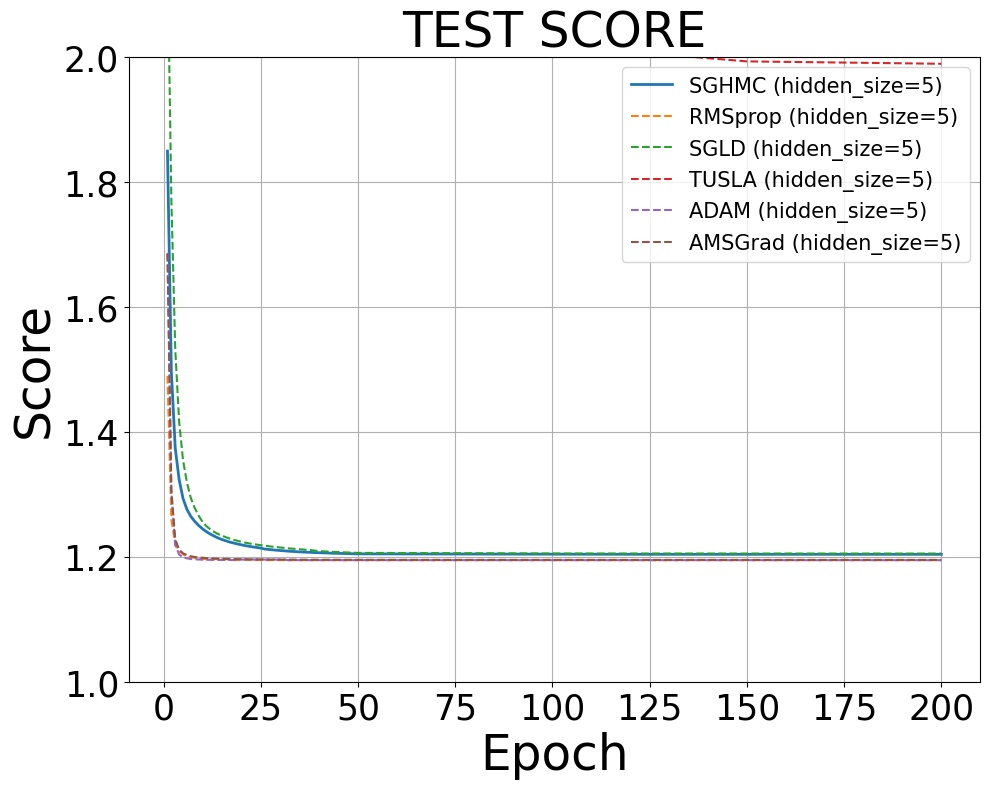

sghmc (hidden_size=5) 1.2039366126060487 nan
rmsprop (hidden_size=5) 1.194571316242218 nan
sgld (hidden_size=5) 1.2051005065441132 nan
tusla (hidden_size=5) 1.9891665577888489 nan
adam (hidden_size=5) 1.1945682525634767 nan
amsgrad (hidden_size=5) 1.1950385391712188 nan


In [43]:
names = {'sghmc (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-sghmc-seed777-lr0.5-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-sgld-seed777-lr0.5-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-theopoula-seed777-lr0.1-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=5)',
          'RMSprop (hidden_size=5)',
          'SGLD (hidden_size=5)',
          'TUSLA (hidden_size=5)',
          'ADAM (hidden_size=5)',
          'AMSGrad (hidden_size=5)',
         # 'theopoula (hidden_size=5)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (1, 2), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [168]:
names = {'sghmc (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-sgld-seed777-lr0.1-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=5)':['BS-p50-m60-strike60.0-num_step40-hs5-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=50, m=60, hs=5', list(data.keys())[0].split('-')[7], list(data.values()))


p=50, m=60, hs=5 sghmc [3610.6833188533783]
p=50, m=60, hs=5 rmsprop [3065.925362110138]
p=50, m=60, hs=5 sgld [3396.025979042053]
p=50, m=60, hs=5 tusla [3745.9697499275208]
p=50, m=60, hs=5 adam [3213.36390542984]
p=50, m=60, hs=5 amsgrad [3215.8528599739075]
p=50, m=60, hs=5 theopoula [3772.554938554764]


## hidden_size = 10

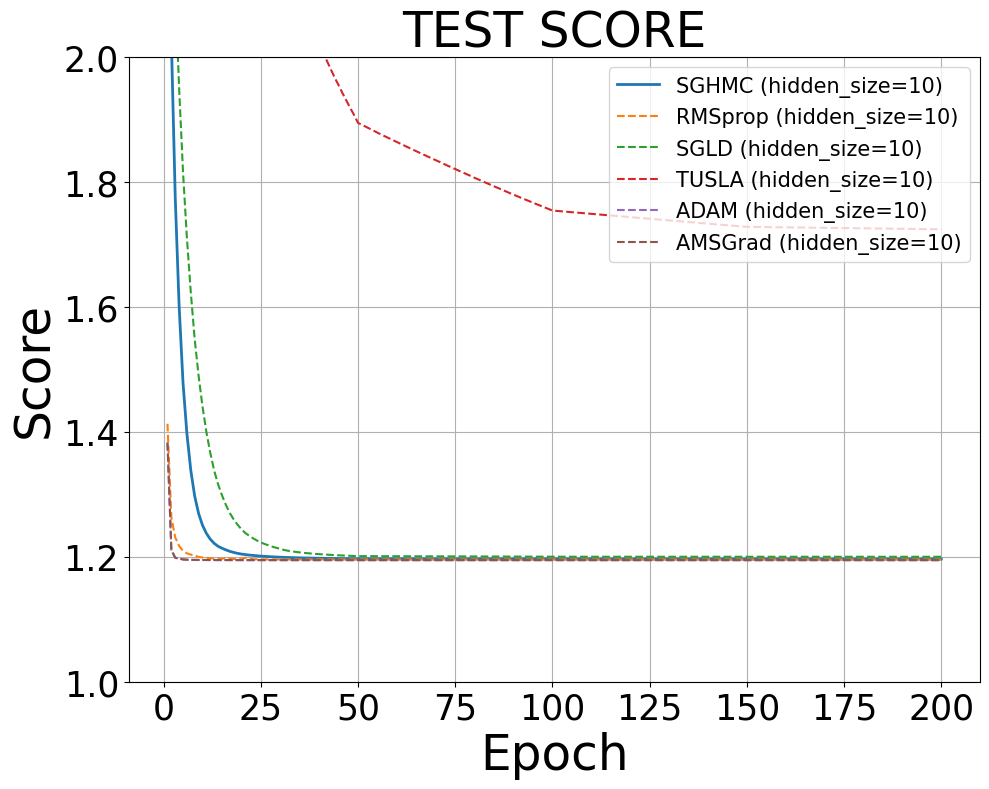

sghmc (hidden_size=10) 1.1964539408683776 nan
rmsprop (hidden_size=10) 1.1956666707992554 nan
sgld (hidden_size=10) 1.1999861478805542 nan
tusla (hidden_size=10) 1.724187982082367 nan
adam (hidden_size=10) 1.1945682764053345 nan
amsgrad (hidden_size=10) 1.1945922911167144 nan


In [47]:
names = {'sghmc (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-sgld-seed777-lr0.1-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        #'theopoula (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
labels = [
          'SGHMC (hidden_size=10)',
          'RMSprop (hidden_size=10)',
          'SGLD (hidden_size=10)',
          'TUSLA (hidden_size=10)',
          'ADAM (hidden_size=10)',
          'AMSGrad (hidden_size=10)',
         # 'theopoula (hidden_size=10)'
         ]
agg_plot(names, curve_type='test', labels=labels, ylim = (1, 2), loc='upper right') 
get_best_acc(names, curve_type='test', labels=labels)

In [170]:
names = {'sghmc (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-sghmc-seed777-lr0.1-beta1.0e+12-gamma0.5-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'rmsprop (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-rmsprop-seed777-lr0.01-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'sgld (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-sgld-seed777-lr0.1-beta1.0e+12-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'tusla (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-tusla-seed777-lr0.1-r0.5-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'adam (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-adam-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'amsgrad (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-amsgrad-seed777-lr0.01-betas0.9-0.999-wdecay0-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000'],
        'theopoula (hidden_size=10)':['BS-p50-m60-strike60.0-num_step40-hs10-bs128-theopoula-seed777-lr0.5-eps0.1-wdecay0-beta1.0e+12-schedulerstep-steplr50-lrgamma0.1-epochs200-n_paths20000']
        }
for name in names:# concentration of pi_beta sampling behavior of SGHMC
  data = get_agg_data_run_time(names[name], curve_type='train')
  #print('{data.keys()}')
  print('p=50, m=60, hs=10', list(data.keys())[0].split('-')[7], list(data.values()))


p=50, m=60, hs=10 sghmc [3618.3594846725464]
p=50, m=60, hs=10 rmsprop [3081.7318811416626]
p=50, m=60, hs=10 sgld [3396.1904587745667]
p=50, m=60, hs=10 tusla [3744.8962421417236]
p=50, m=60, hs=10 adam [3187.848292350769]
p=50, m=60, hs=10 amsgrad [3177.196358203888]
p=50, m=60, hs=10 theopoula [3828.2877295017242]
